In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

#Import libraries for multicollineaarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import libraries for transformations
import joblib



In [ ]:
from SARIMAX import remove_multicollinear, calculate_vif
from datascript import load_data, split_data
import datascript
import os
from transformscript import inverse_transform_data

SARIMAX for VISAYAS
DATA PREPROCESSING

In [3]:
#Import the necessary files
base_path = os.path.dirname(os.path.abspath(datascript.__file__))  # Gets the current working directory
complete_vis_transformed = load_data("VIS", True)
complete_vis_untransformed = load_data("VIS", False)


In [17]:
#Prepare exogenous variables and check for multicollinearity
full_transformed_exog = complete_vis_transformed.drop(columns=['GWAP', 'LWAP'])
full_transformed_exog = full_transformed_exog.shift(1)
full_transformed_exog = full_transformed_exog.fillna(0)
full_exog_train, full_exog_test = split_data(full_transformed_exog, False)

transformed_exog = remove_multicollinear(full_transformed_exog, 10)
calculate_vif(transformed_exog)

Dropping TMIN_Catbalogan with VIF of 54.218651008175584
Dropping TMAX_Catarman with VIF of 46.59398015858564
Dropping TMAX_Maasin with VIF of 40.56812606246489
Dropping TMAX_Roxas City with VIF of 33.45791443088326
Dropping TMAX_Dumaguete with VIF of 28.36173156089073
Dropping TMIN_Maasin with VIF of 25.41637804261446
Dropping Demand with VIF of 20.89884817758751
Dropping TMIN_Roxas City with VIF of 16.856679266222443
Dropping TMIN_Catarman with VIF of 15.080060848513147
Final VIF values:
                 feature       VIF
0              FLOW_VIS  5.713263
1       Reserve_GWAP_Fr  5.196630
2       Reserve_GWAP_Ru  4.602605
3       Reserve_GWAP_Rd  2.295583
4       Reserve_GWAP_Dr  5.816024
5   RAINFALL_Catbalogan  3.486504
6       TMAX_Catbalogan  7.280841
7   RAINFALL_Roxas City  2.003107
8     RAINFALL_Catarman  3.341850
9       RAINFALL_Maasin  2.679340
10   RAINFALL_Dumaguete  2.234772
11       TMIN_Dumaguete  8.567450


,feature,VIF
0,FLOW_VIS,5.713263
1,Reserve_GWAP_Fr,5.196630
2,Reserve_GWAP_Ru,4.602605
3,Reserve_GWAP_Rd,2.295583
4,Reserve_GWAP_Dr,5.816024
5,RAINFALL_Catbalogan,3.486504
6,TMAX_Catbalogan,7.280841
7,RAINFALL_Roxas City,2.003107
8,RAINFALL_Catarman,3.341850
9,RAINFALL_Maasin,2.679340


In [ ]:
#Prepare the necessary datasets
#Target Variables
train_data, test_data = split_data(complete_vis_transformed, False)
GWAP_train = train_data['GWAP']
GWAP_test = test_data['GWAP']
LWAP_train = train_data['LWAP']
LWAP_test = test_data['LWAP']

#Exogenous Variables
exog_train, exog_test = split_data(transformed_exog, False)

#Untransformed variables for verification 
untransformed_train_data, untransformed_test_data = split_data(complete_vis_untransformed, False)
untransformed_GWAP_test = untransformed_test_data['GWAP']
untransformed_LWAP_test = untransformed_test_data['LWAP']



In [6]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Visayas GWAP")
lwap_plot.update_layout(title=f"Visayas LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

Differencing

In [7]:
%run SARIMAX.py

#Checking for stationarity in GWAP data
GWAP_train = perform_differencing(GWAP_train)
LWAP_train = perform_differencing(LWAP_train)

#Perform differencing on train exogenous data
diff_exog_train = perform_df_differencing(exog_train)
diff_exog_train = diff_exog_train.fillna(0)

#Perform differencing on test exogenous data
diff_exog_test = perform_df_differencing(exog_test)
diff_exog_test = diff_exog_test.fillna(0)


Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_VIS' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Ru' is stationary after differencing 1 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\S

Column 'Reserve_GWAP_Rd' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'TMAX_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 0 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\S

Column 'RAINFALL_Maasin' is stationary after differencing 0 times.
Column 'RAINFALL_Dumaguete' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differencing 0 times.
Column 'FLOW_VIS' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Ru' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Rd' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'TMAX_Catbalogan' is stationary after differencing 1 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 1 times.
Column 'RAINFALL_Maasin' is stationary after differencing 1 times.
Column 'RAINFALL_Dumaguete' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differenci

C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\S

Order Specification

The ACF for GWAP is seen below
The PACF for GWAP is seen below


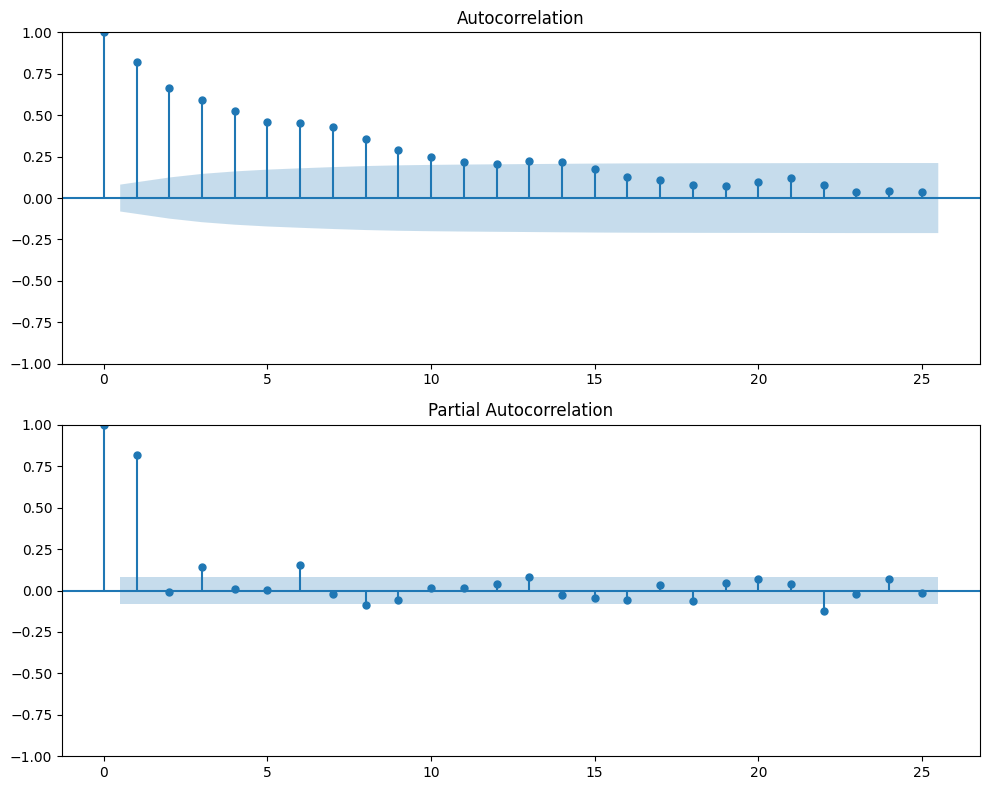

The ACF for LWAP is seen below
The PACF for LWAP is seen below


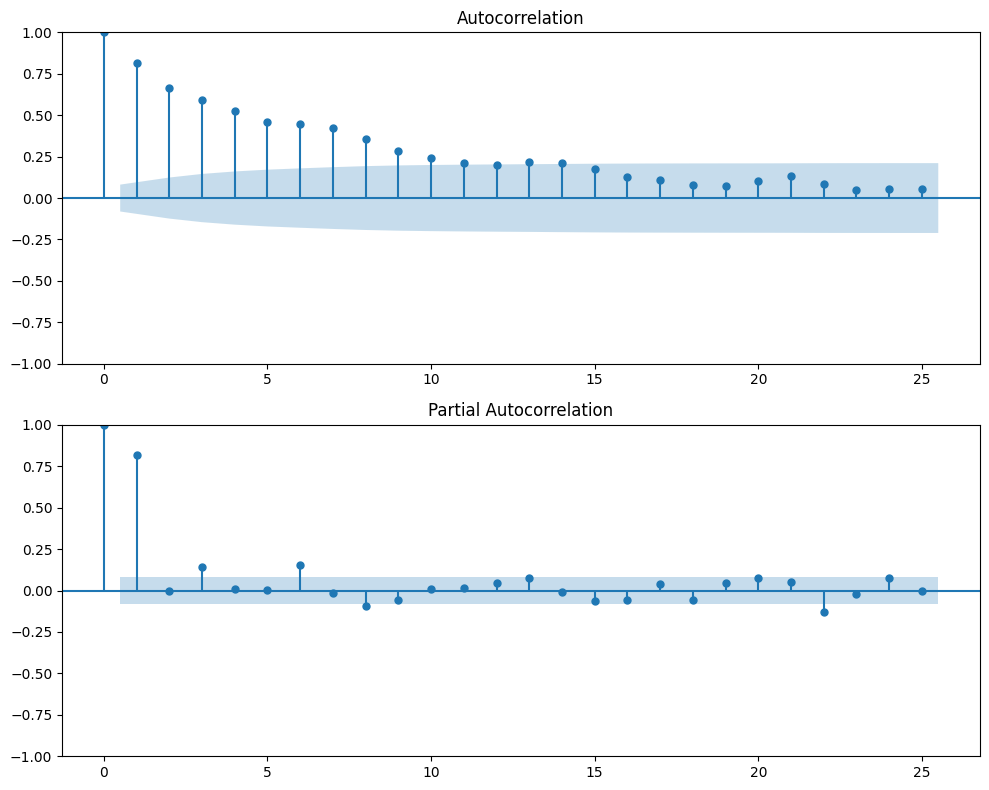

In [8]:
%run SARIMAX.py

plot_orders(GWAP_train, lags=25, alpha=0.05, var='GWAP')
plot_orders(LWAP_train, lags=25, alpha=0.05, var='LWAP')

GWAP and LWAP Forecasting

In [34]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=13, exog_data=diff_exog_train )

#Display results of previous function
GWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 6 and an AIC of -1070.7818442949656


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(0, 0, 1, 6), suppress_warnings=True)

In [17]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=14, exog_data=diff_exog_train )

#Display results of previous function
LWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 7 and an AIC of -1030.783221940742


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(1, 0, 0, 7), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -1.158425
         Iterations: 11
         Function evaluations: 1806
                                      SARIMAX Results                                      
Dep. Variable:                                GWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 14)   Log Likelihood                 676.520
Date:                             Thu, 06 Mar 2025   AIC                          -1319.040
Time:                                     14:56:22   BIC                          -1244.781
Sample:                                 01-01-2022   HQIC                         -1290.095
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -1.075692
         Iterations: 12
         Function evaluations: 1937
                                      SARIMAX Results                                      
Dep. Variable:                                LWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 14)   Log Likelihood                 628.204
Date:                             Thu, 06 Mar 2025   AIC                          -1222.409
Time:                                     14:56:54   BIC                          -1148.149
Sample:                                 01-01-2022   HQIC                         -1193.464
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

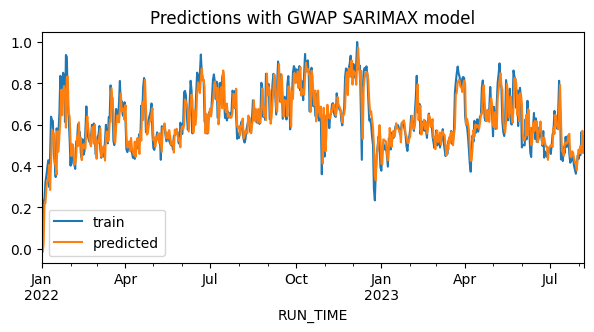

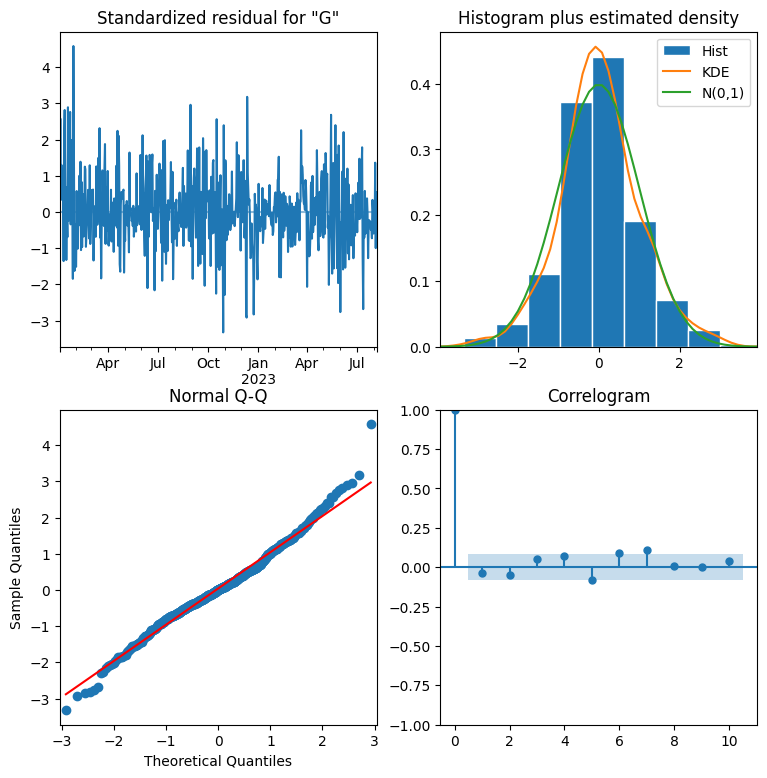

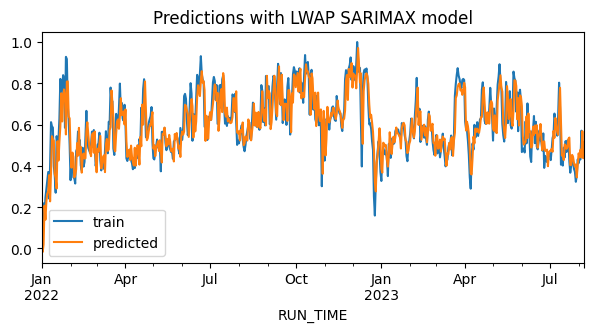

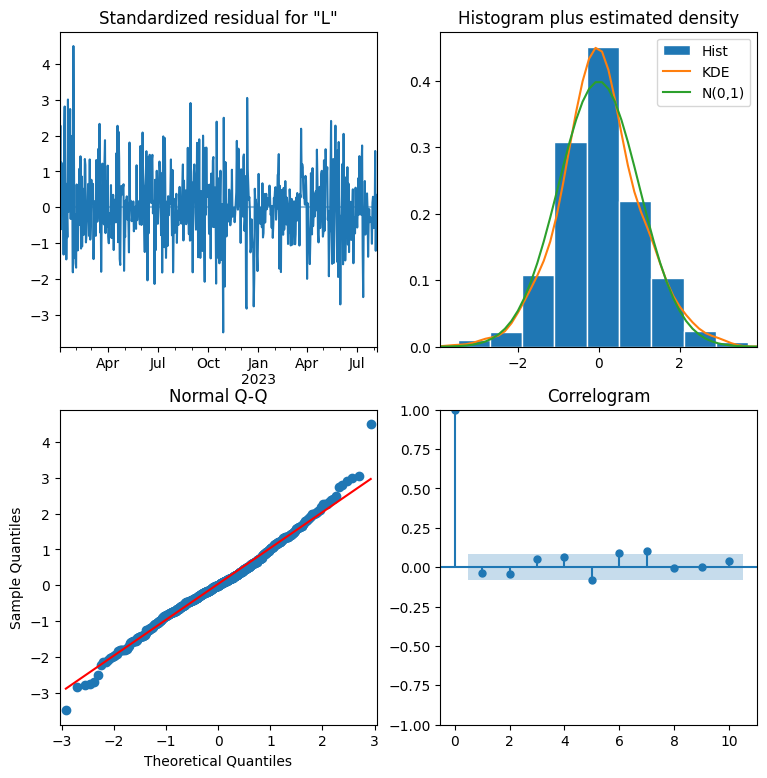

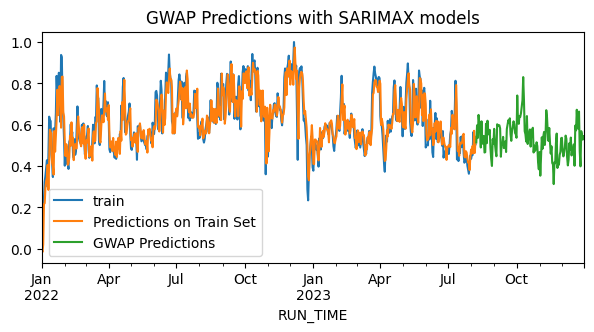

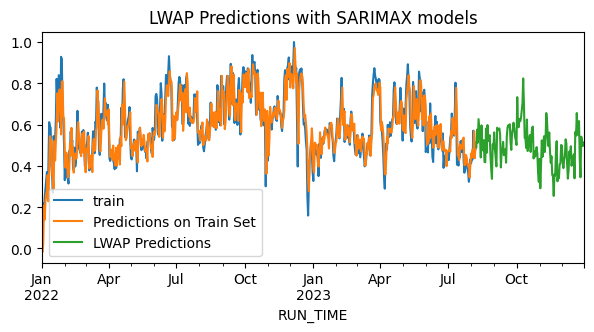

In [10]:
#Optimized orders for GWAP are (1,1,1)(2,0,0,14) and for LWAP are (1,1,1)(2,0,0)(14)
#This function fits the model and plots predictions on the train set; shows the summary of results and residuals diagnostics; and predicts on train set
%run SARIMAX.py

gwap_predictions, lwap_predictions, gwap_train_predict, lwap_train_predict = fit_SARIMAX(gwap_endog=GWAP_train, lwap_endog= LWAP_train, train_exog=diff_exog_train, gwap_order=(1,1,1), gwap_seasonal_order=(2,0,0,14), lwap_order = (1,1,1), lwap_seasonal_order=(2,0,0,14), GWAP_test=GWAP_test, LWAP_test=LWAP_test, exog_test = diff_exog_test)


Applying inverse transformations

In [ ]:
lwap_predictions

,predicted_mean
2023-08-08,0.514463
2023-08-09,0.597329
2023-08-10,0.536015
2023-08-11,0.647558
2023-08-12,0.606387
...,...
2023-12-27,0.568859
2023-12-28,0.551027
2023-12-29,0.528030
2023-12-30,0.545543


In [39]:
%run transformscript.py
gwap_predictions = pd.DataFrame(gwap_predictions)
gwap_predictions = gwap_predictions.rename(columns={'predicted_mean':'GWAP'})
lwap_predictions = pd.DataFrame(lwap_predictions)
lwap_predictions = lwap_predictions.rename(columns={'predicted_mean':'LWAP'})
final_test = pd.concat([gwap_predictions, lwap_predictions, full_exog_test], axis=1)
final_test

,GWAP,LWAP,FLOW_VIS,Reserve_GWAP_Fr,Reserve_GWAP_Ru,Reserve_GWAP_Rd,Reserve_GWAP_Dr,Demand,RAINFALL_Catbalogan,TMAX_Catbalogan,...,TMIN_Roxas City,RAINFALL_Catarman,TMAX_Catarman,TMIN_Catarman,RAINFALL_Maasin,TMAX_Maasin,TMIN_Maasin,RAINFALL_Dumaguete,TMAX_Dumaguete,TMIN_Dumaguete
2023-08-08,0.514463,0.490086,0.076134,0.000000,0.000000,0.000000,0.315722,0.900729,0.000000,0.788789,...,0.721311,0.000000,0.93,0.708861,0.000000,0.803738,0.579710,0.000000,0.9625,0.283019
2023-08-09,0.597329,0.575302,0.100348,0.000000,0.266628,0.000005,0.369061,0.987761,0.000000,0.854809,...,0.737705,0.000000,0.94,0.784810,0.000000,0.803738,0.623188,0.000000,0.8500,0.339623
2023-08-10,0.536015,0.512473,0.112420,0.000000,0.000002,0.000027,0.315862,0.986513,0.000000,0.711989,...,0.573770,0.000000,0.91,0.708861,0.816916,0.803738,0.550725,0.143018,0.7375,0.452830
2023-08-11,0.647558,0.626699,0.254999,0.000000,0.493330,0.000003,0.445031,0.927361,0.244081,0.539336,...,0.639344,0.000000,0.80,0.797468,0.757243,0.476636,0.536232,0.291068,0.6875,0.339623
2023-08-12,0.606387,0.582010,0.261675,0.000000,0.000002,0.000000,0.347017,0.876035,0.171262,0.788789,...,0.524590,0.000000,0.90,0.734177,0.477202,0.710280,0.695652,0.000000,0.9125,0.433962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.568859,0.541598,0.208675,0.214194,0.753815,1.000036,0.734511,0.494347,0.557285,0.515939,...,0.770492,0.616356,0.52,0.493671,0.490954,0.663551,0.579710,0.830139,0.4125,0.528302
2023-12-28,0.551027,0.521268,0.111413,0.210896,0.621580,1.000036,0.803545,0.630353,0.069472,0.372829,...,0.737705,0.675319,0.52,0.468354,0.679078,0.616822,0.362319,0.143018,0.5500,0.490566
2023-12-29,0.528030,0.495936,0.104289,0.000005,0.760055,1.000036,0.769148,0.678326,0.397938,0.641169,...,0.737705,0.298488,0.63,0.518987,0.000000,0.710280,0.507246,0.000000,0.5250,0.433962
2023-12-30,0.545543,0.512149,0.098373,0.181646,0.807766,1.000036,0.775683,0.673756,0.566816,0.247367,...,0.770492,0.508450,0.63,0.493671,0.635754,0.654206,0.507246,0.393286,0.4125,0.660377


In [40]:
inverse_test = inverse_transform_data(final_test, 'VIS')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



In [49]:
GWAP_predictions_inverse = inverse_test['GWAP']
LWAP_predictions_inverse = inverse_test['LWAP']

GWAP = complete_vis_untransformed['GWAP']
LWAP = complete_vis_untransformed['LWAP']


Mean Absolute Error (MAE) on Test Set for GWAP: 1471.2178603548077
Root Mean Squared Error (RMSE) on Test Set for GWAP: 2196.0647889935667
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 23.05418844585756


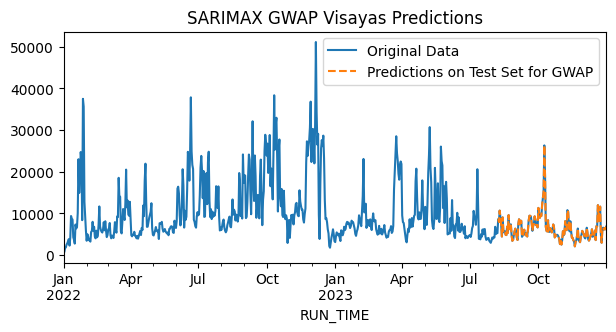

Mean Absolute Error (MAE) on Test Set for LWAP: 1589.720143445513
Root Mean Squared Error (RMSE) on Test Set for LWAP: 2337.4575422794896
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 23.195270754316706


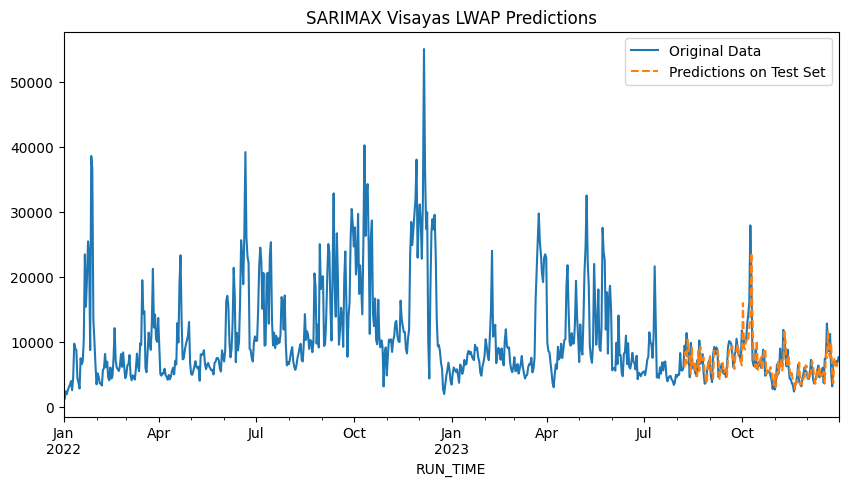

In [50]:
%run SARIMAX.py
evaluate_models(GWAP, LWAP, GWAP_predictions_inverse, untransformed_GWAP_test, untransformed_LWAP_test, LWAP_predictions_inverse, Region='Visayas')


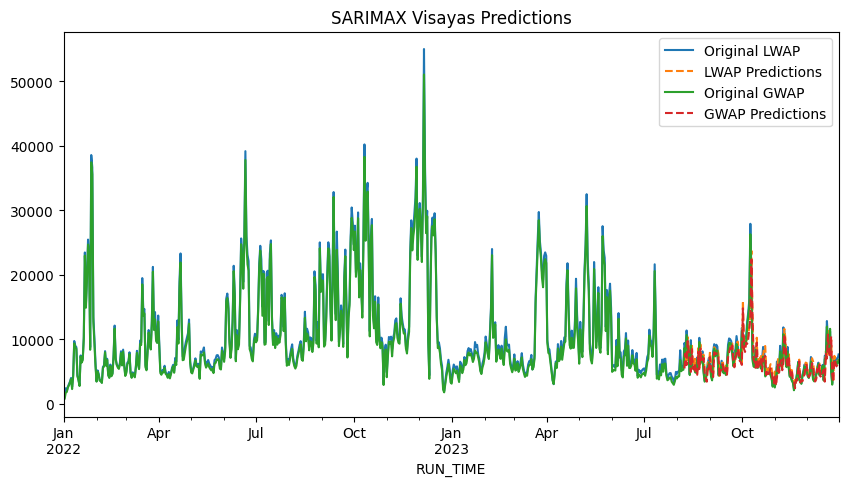

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original LWAP')
LWAP_predictions_inverse.plot(ax=ax, label='LWAP Predictions', linestyle='--')
GWAP.plot(ax=ax, label='Original GWAP')
GWAP_predictions_inverse.plot(ax=ax, label='GWAP Predictions', linestyle='--')
ax.set_title('SARIMAX Visayas Predictions')
ax.legend()
plt.show()

In [ ]:
GWAP_predictions_inverse.to_csv('vis-gwap-predictions.csv', index=False)
LWAP_predictions_inverse.to_csv('vis-lwap-predictions.csv', index=False)